# Importing important liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing liberary for Random Forest as well
from sklearn.ensemble import RandomForestRegressor

# Understanding the data and exploring

In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Understanding the categorical data

In [6]:
# symboling: -2 (least risky) to +3 most risky
cars['symboling'].astype('category').value_counts().sort_index()
# Most cars are 0,1,2

symboling
-2     3
-1    22
0     67
1     54
2     32
3     27
Name: count, dtype: int64

In [7]:
# std => oxygen intake from atm pressure
# turbo -> pressurised Oxygen intake
cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [8]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [9]:
# Numerical columns

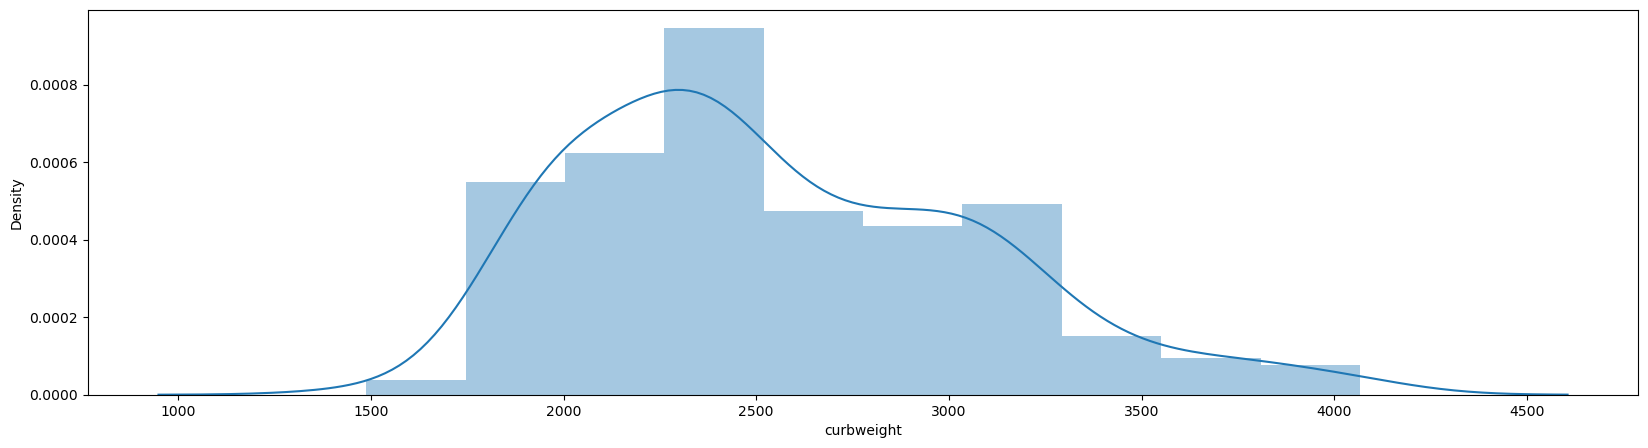

In [10]:
# curbweight: weight of car without occupants or baggage
plt.figure(figsize=(20,5))
sns.distplot(cars['curbweight'])
plt.show()

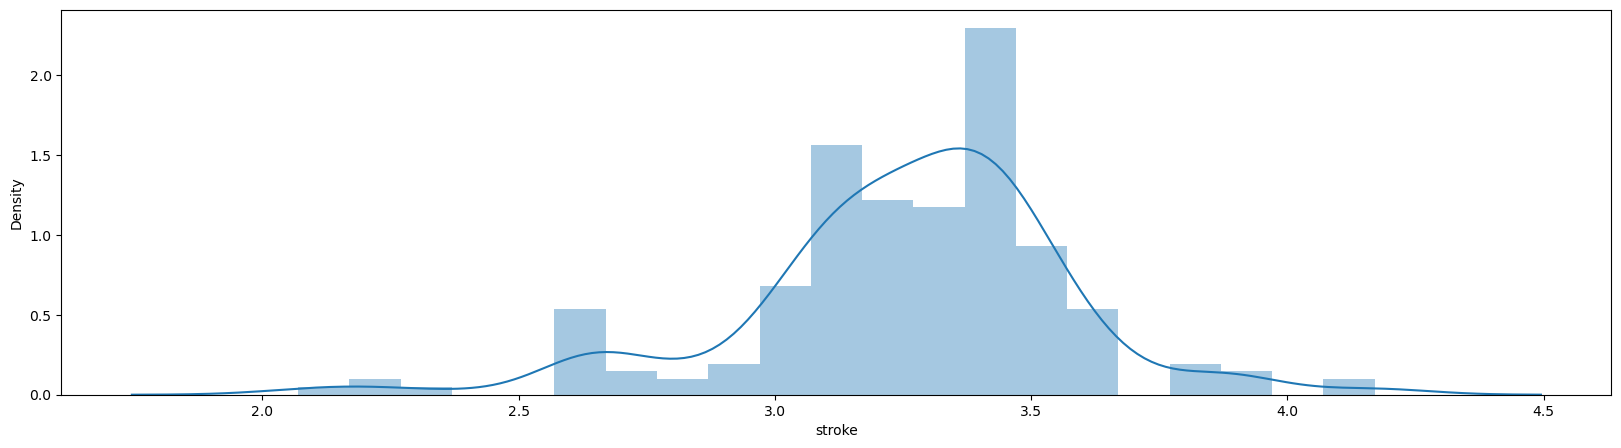

In [11]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)
plt.figure(figsize=(20,5))
sns.distplot(cars['stroke'])
plt.show()

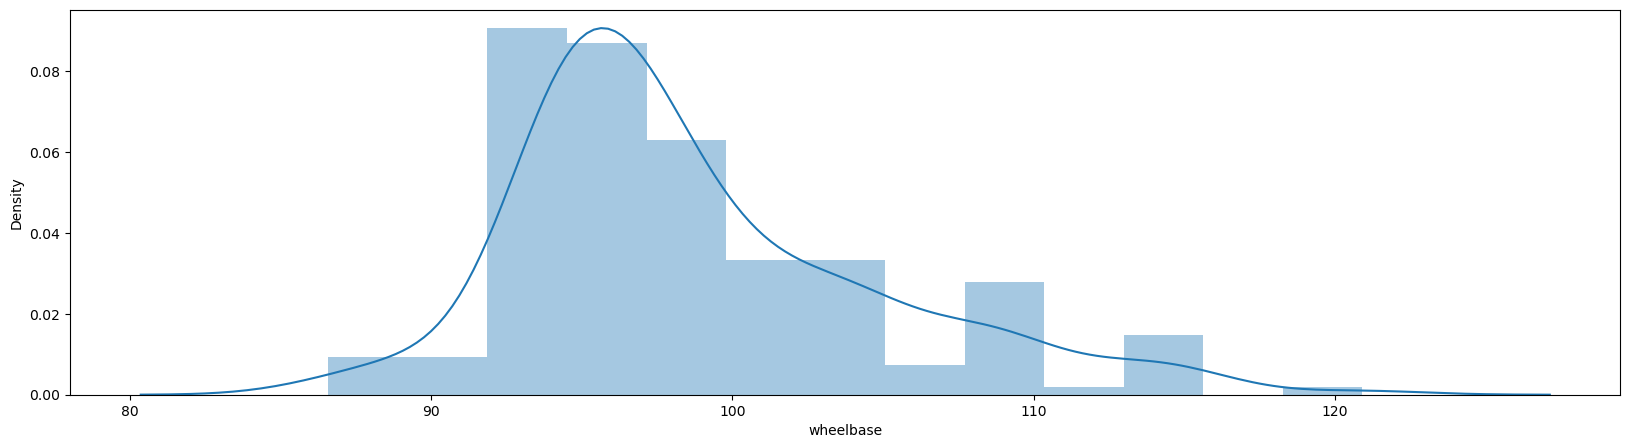

In [12]:
# wheelbase: distance between centre of front and rarewheels
plt.figure(figsize=(20,5))
sns.distplot(cars['wheelbase'])
plt.show()

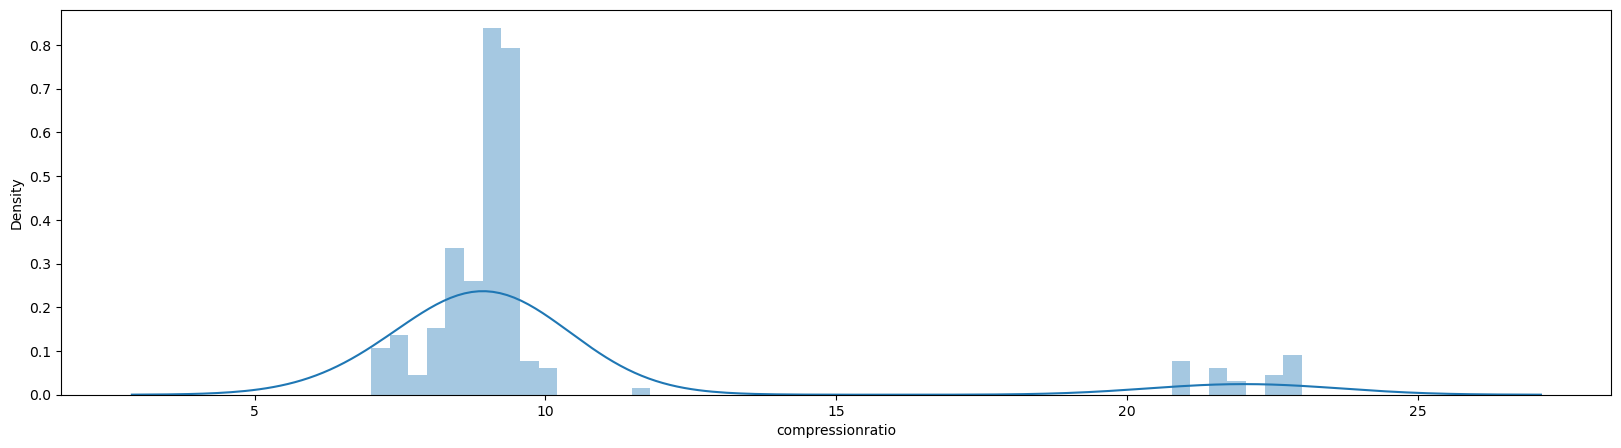

In [13]:
# ratio of volume of compression chamber at largest capacity to least capacity
plt.figure(figsize=(20,5))
sns.distplot(cars['compressionratio'])
plt.show()

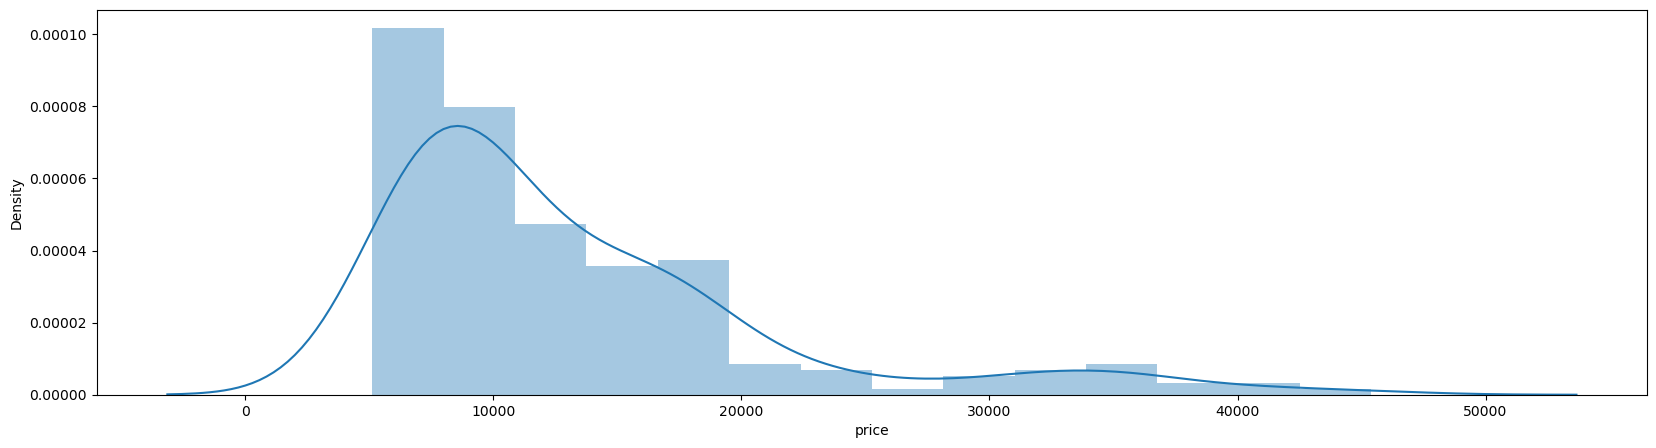

In [14]:
plt.figure(figsize=(20,5))
sns.distplot(cars['price'])
plt.show()

In [15]:
# all numeric variables in the dataset
cars_numeric = cars.select_dtypes(include=['float', 'int'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling','car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


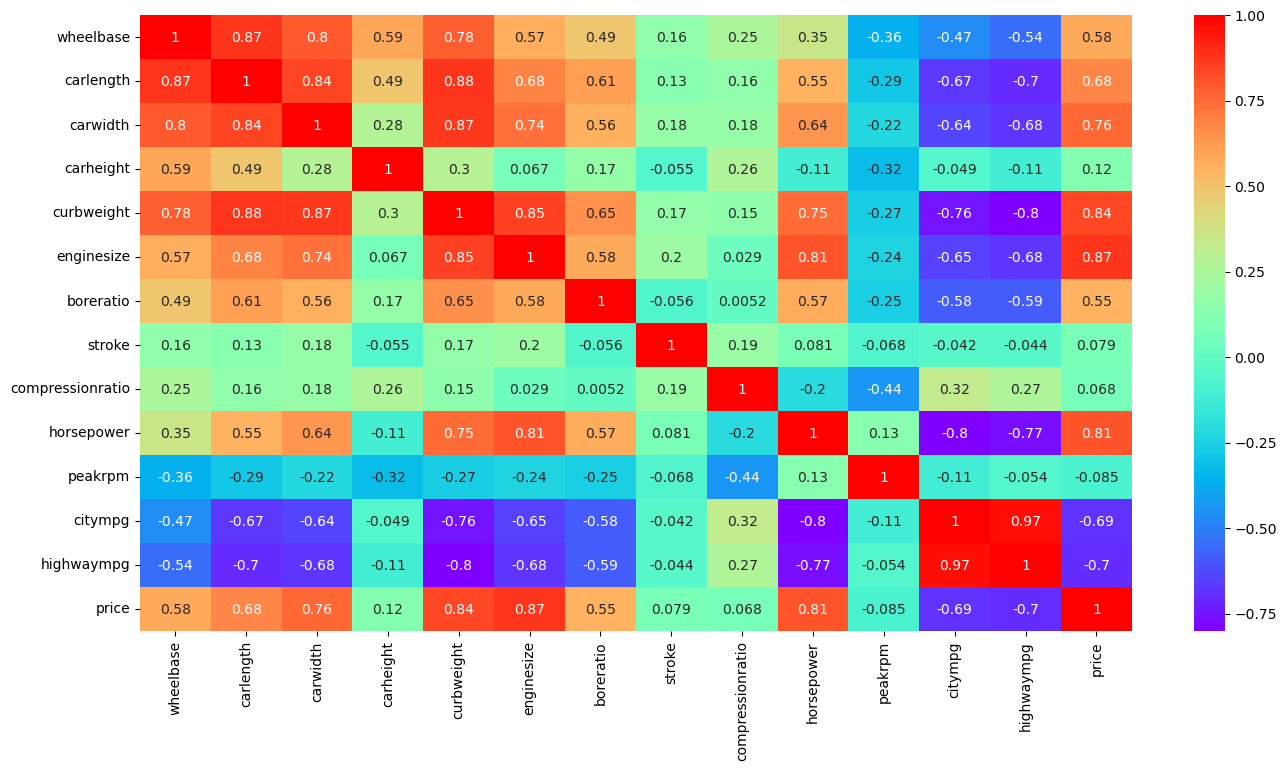

In [17]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(cars_numeric.corr(), cmap="rainbow", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variable
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower
- Price is negatively correlated to ```citympg``` and ```highwaympg```s:

# Data Cleaning

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [19]:
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
cars['CarName'][:10]

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [32]:
car_company = cars['CarName'].str.split(" ").str.get(0)
car_company

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [34]:
car_company.value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [36]:
cars['car_company'] = car_company
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [37]:
# There are some bad errors in the form of spelling error
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [38]:
# look at all values 
cars['car_company'].astype('category').value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [39]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Lets prep data for model 

In [49]:
#Spliting into X and y

X = cars.drop(columns='price')
y = cars['price']

In [50]:
X.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [51]:
# Creating dummy variable for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [52]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True, dtype = int)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X = X.drop(list(cars_categorical.columns), axis=1)
X = pd.concat([X, cars_dummies], axis=1)

In [54]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['wheelbase', 'carlength', 'carwidth',
         'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke',
         'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]=scaler.fit_transform(X_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])
X_train.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,123,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,...,0,0,1,0,0,0,0,0,0,0
125,126,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,...,0,0,0,1,0,0,0,0,0,0
166,167,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,...,0,0,0,0,0,0,0,1,0,0
1,2,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,...,0,0,0,0,0,0,0,0,0,0
199,200,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]=scaler.transform(X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])
X_test.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,161,-0.475189,-0.566894,-0.652569,-0.227502,-0.820850,-0.660242,-0.451443,-0.706633,-0.278345,...,0,0,0,0,0,0,0,1,0,0
186,187,-0.205872,-0.136752,-0.154030,0.885789,-0.487359,-0.390836,-0.451443,0.481417,-0.278345,...,0,0,0,0,0,0,0,0,1,0
59,60,0.046613,0.349149,0.299187,0.061129,-0.284685,-0.072447,0.317543,0.449308,-0.384120,...,0,0,0,0,0,0,0,0,0,0
165,166,-0.677177,-0.375720,-0.833856,-0.392434,-0.505784,-0.660242,-0.259197,-0.546085,-0.172569,...,0,0,0,0,0,0,0,1,0,0
140,141,-0.879165,-1.283797,-0.924500,0.885789,-0.551846,-0.415328,1.201877,-1.958901,-0.357676,...,0,0,0,0,0,0,1,0,0,0


# Model Building and Evaluation

# Lasso Regression

In [64]:
lasso = Lasso()
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1,
            0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
            4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

model_cv = GridSearchCV(
    estimator= lasso,
    param_grid=params,
    scoring= 'r2',
    cv = folds,
    return_train_score = True,
    verbose = 1
)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025852,0.004133,0.002202,0.000399,0.0001,{'alpha': 0.0001},0.748464,0.886597,0.939104,0.300135,...,0.707665,0.225934,26,0.986575,0.979229,0.976673,0.971538,0.986815,0.980166,0.005879
1,0.029182,0.002586,0.001998,0.000005,0.001,{'alpha': 0.001},0.748126,0.886622,0.939090,0.300348,...,0.707673,0.225840,25,0.986574,0.979228,0.976673,0.971536,0.986814,0.980165,0.005879
2,0.025755,0.007150,0.000402,0.000493,0.01,{'alpha': 0.01},0.744488,0.886851,0.938953,0.302465,...,0.707674,0.224906,24,0.986566,0.979220,0.976667,0.971520,0.986805,0.980156,0.005881
3,0.031847,0.000802,0.000000,0.000000,0.05,{'alpha': 0.05},0.728647,0.887722,0.938401,0.311670,...,0.706883,0.221126,28,0.986526,0.979181,0.976645,0.971444,0.986764,0.980112,0.005889
4,0.031237,0.000579,0.000000,0.000000,0.1,{'alpha': 0.1},0.715654,0.888038,0.937877,0.324619,...,0.706987,0.216255,27,0.986470,0.979128,0.976621,0.971352,0.986709,0.980056,0.005896


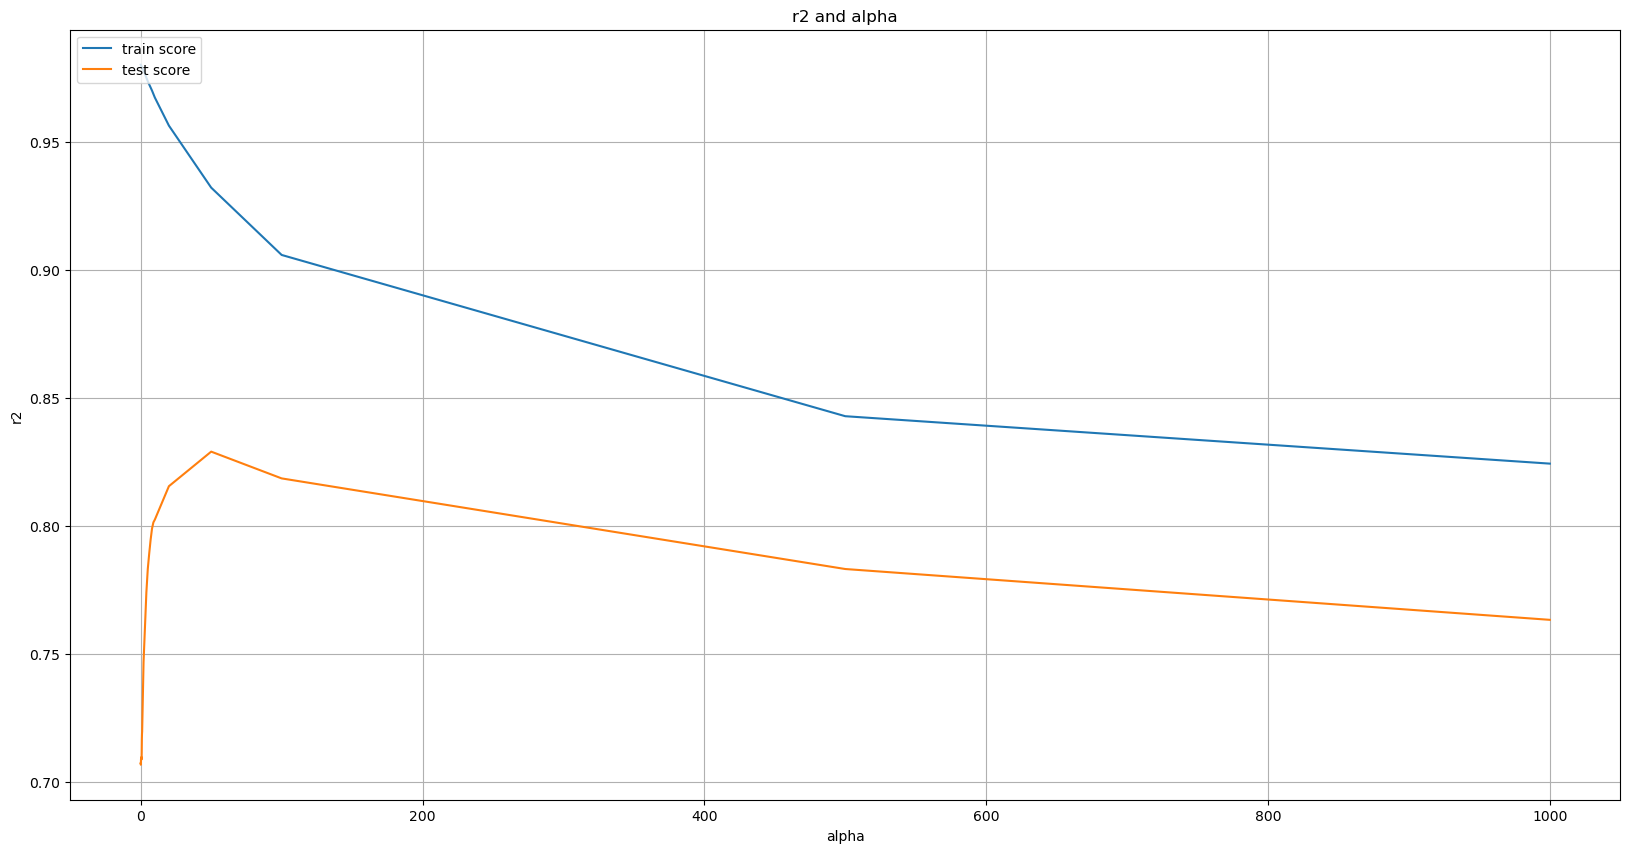

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([  -12.90850574,     0.        ,    -0.        ,  1367.26314572,
           0.        ,  1518.78367554,  2494.93040782,   170.49616403,
        -558.2199195 ,   481.95549824,  1313.16826473,   322.94232479,
          -0.        ,    -0.        ,     0.        ,   -70.69746505,
          -0.        ,     0.        ,   158.77544663,    -0.        ,
           0.        ,     0.        ,     0.        ,  -409.02115905,
           0.        ,    -0.        ,  -164.01048795,  1182.00554172,
           0.        ,    -0.        ,    -0.        ,  1219.77099166,
           0.        ,  -112.97403808,     0.        ,     0.        ,
       -1652.01057259,     0.        ,     0.        ,    -0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,    -0.        ,     0.        ,
          -0.        ,  2669.44351433,   167.39686077,     0.        ,
          -0.        ,    -0.        ,     0.        ,     0.        ,
      

In [69]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
49,car_company_bmw,2669.443514
6,enginesize,2494.930408
5,curbweight,1518.783676
3,carwidth,1367.263146
10,horsepower,1313.168265
...,...,...
59,car_company_nissan,-125.910017
26,drivewheel_fwd,-164.010488
23,carbody_hatchback,-409.021159
8,stroke,-558.219919


In [70]:
imp_lasso =imp_lasso[imp_lasso['Coefficient'] !=0]
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
49,car_company_bmw,2669.443514
6,enginesize,2494.930408
5,curbweight,1518.783676
3,carwidth,1367.263146
10,horsepower,1313.168265
31,enginetype_ohc,1219.770992
27,drivewheel_rwd,1182.005542
9,compressionratio,481.955498
11,peakrpm,322.942325
7,boreratio,170.496164


In [71]:
y_pred = lasso.predict(X_test)

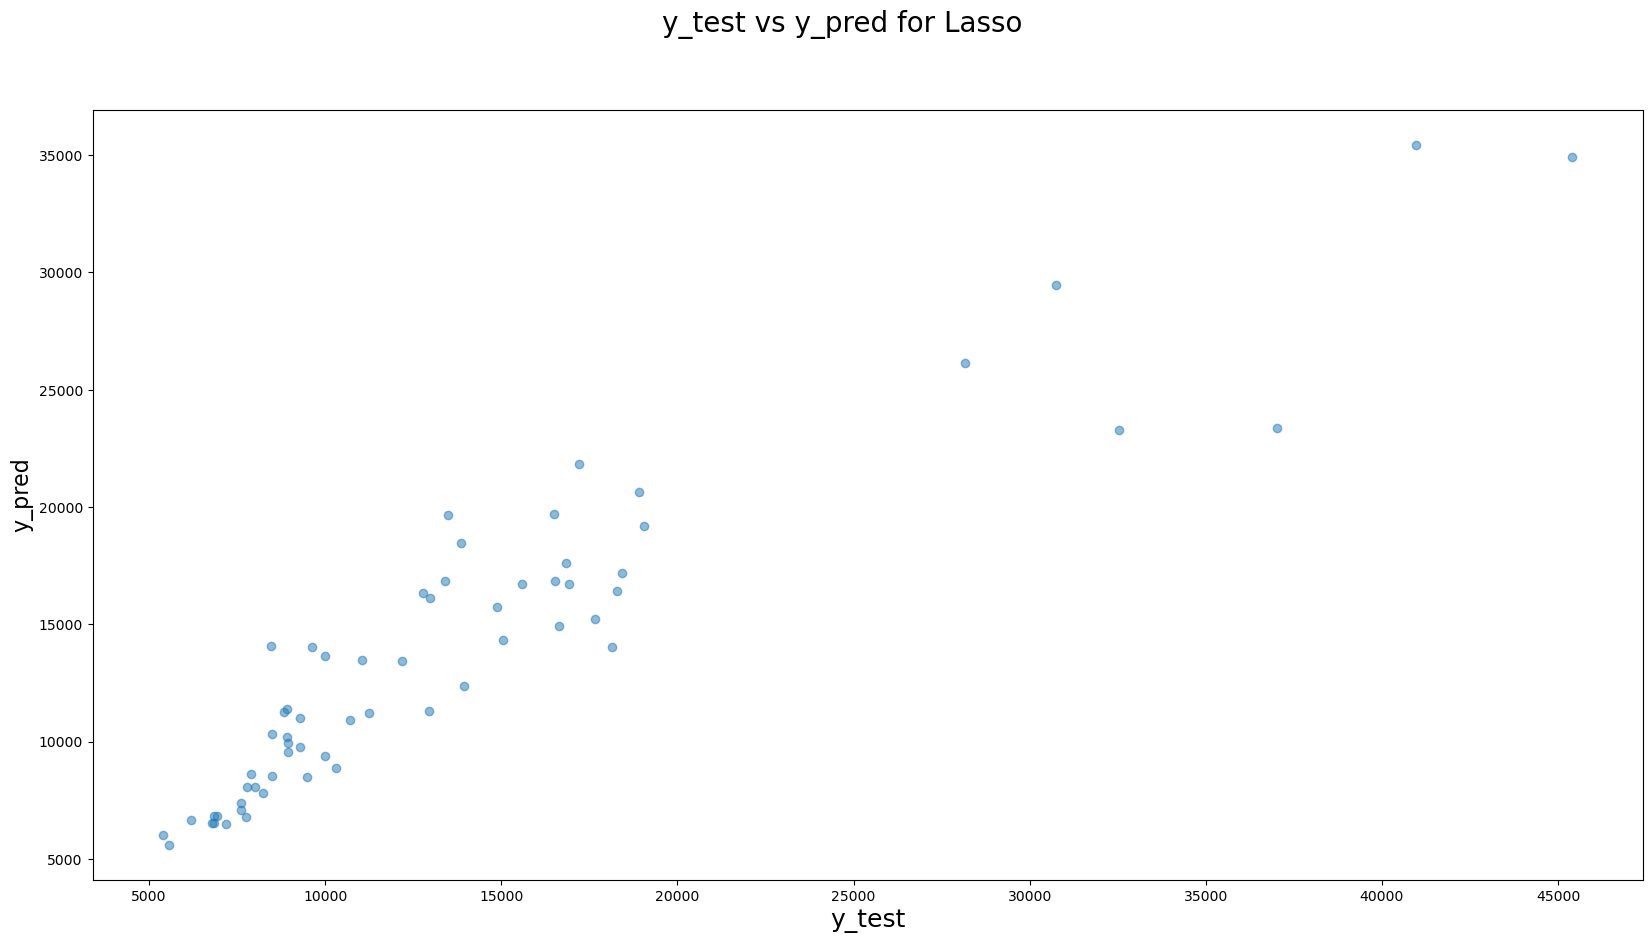

In [72]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred for Lasso', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [73]:
metrics.r2_score(y_test,y_pred)

0.8422195603235296

# Applying Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
y_pred_forest = random_forest_regressor.predict(X_test)

In [76]:
metrics.r2_score(y_test,y_pred_forest)

0.907220080758215

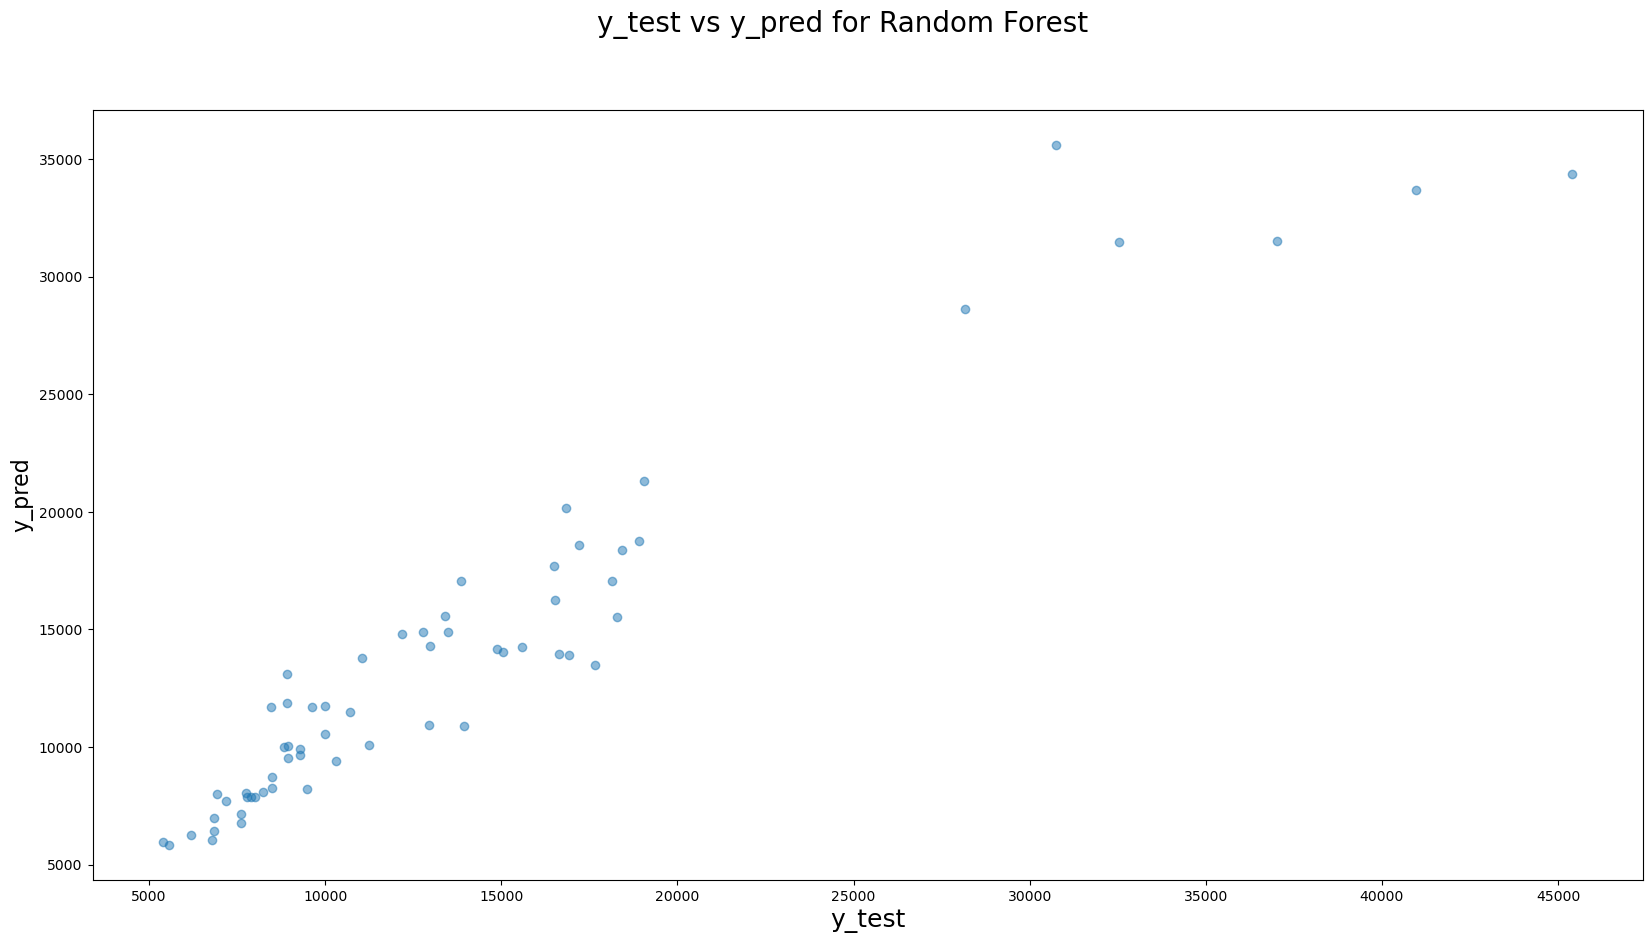

In [77]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred_forest, alpha=.5)
fig.suptitle('y_test vs y_pred for Random Forest', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()